Importing lib


In [3]:
import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('/Users/veerbasantreddy/Desktop/mlproject/notebook/data/stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [15]:
#missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [16]:
df.duplicated().sum() 

0

In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
df.nunique() #unique values in the column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
print("categories in 'gender' variable: ")
print(df['gender'].unique())
print("\n")
print("categories in 'race_ethnicity' variable: ")
print(df['race_ethnicity'].unique())
print("\n")
print("categories in 'parental_level_of_education' variable: ")
print(df['parental_level_of_education'].unique())
print("\n")
print("categories in 'race_ethnicity' variable: ")
print(df['race_ethnicity'].unique())
print("\n")
print("categories in 'test_preparation_course' variable: ")
print(df['test_preparation_course'].unique())
print("\n")
print("categories in 'reading_score' variable: ")
print(df['reading_score'].unique())
print("\n")

categories in 'gender' variable: 
['female' 'male']


categories in 'race_ethnicity' variable: 
['group B' 'group C' 'group A' 'group D' 'group E']


categories in 'parental_level_of_education' variable: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


categories in 'race_ethnicity' variable: 
['group B' 'group C' 'group A' 'group D' 'group E']


categories in 'test_preparation_course' variable: 
['none' 'completed']


categories in 'reading_score' variable: 
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]




In [21]:
#identify the numerical and categorical features

numerical_features = [features for features in df.columns if df[features].dtype!='object']

catgorical_features = [features for features in df.columns if df[features].dtype=='object']

print("number of numerical features {} are:  {}".format(len(numerical_features),numerical_features))
print("number of catgorical features {} are:  {}".format(len(catgorical_features),catgorical_features))

number of numerical features 3 are:  ['math_score', 'reading_score', 'writing_score']
number of catgorical features 5 are:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [22]:
#feature eng
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [23]:
reading_full =df[df['reading_score']==100]['average'].count()
print("reading:  {}".format(reading_full))

writing_full =df[df['writing_score']==100]['average'].count()
print("writing_full:  {}".format(writing_full))

math_full =df[df['math_score']==100]['average'].count()
print("math full:  {}".format(math_full))

reading:  17
writing_full:  14
math full:  7


In [24]:
reading_less_20= df[df['reading_score']<=20]['average'].count()
print("no of reading_less then 20:  {} " .format(reading_less_20))

writing_less_20= df[df['writing_score']<=20]['average'].count()
print("no of writing_less then 20:  {} " .format(writing_less_20))

math_less_20= df[df['math_score']<=20]['average'].count()
print("no of math_less then 20:  {} " .format(math_less_20))

no of reading_less then 20:  1 
no of writing_less then 20:  3 
no of math_less then 20:  4 


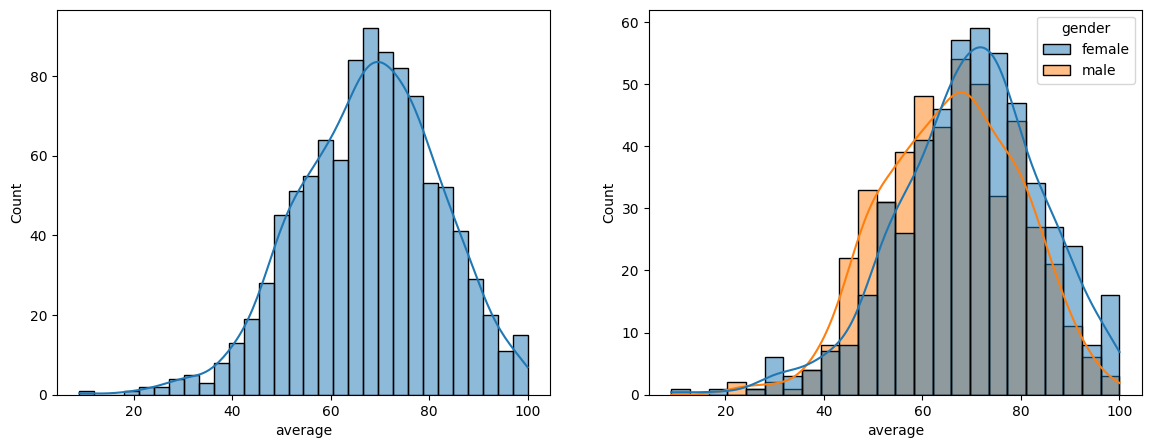

In [55]:
fig,axs= plt.subplots(1,2,figsize=(14,5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

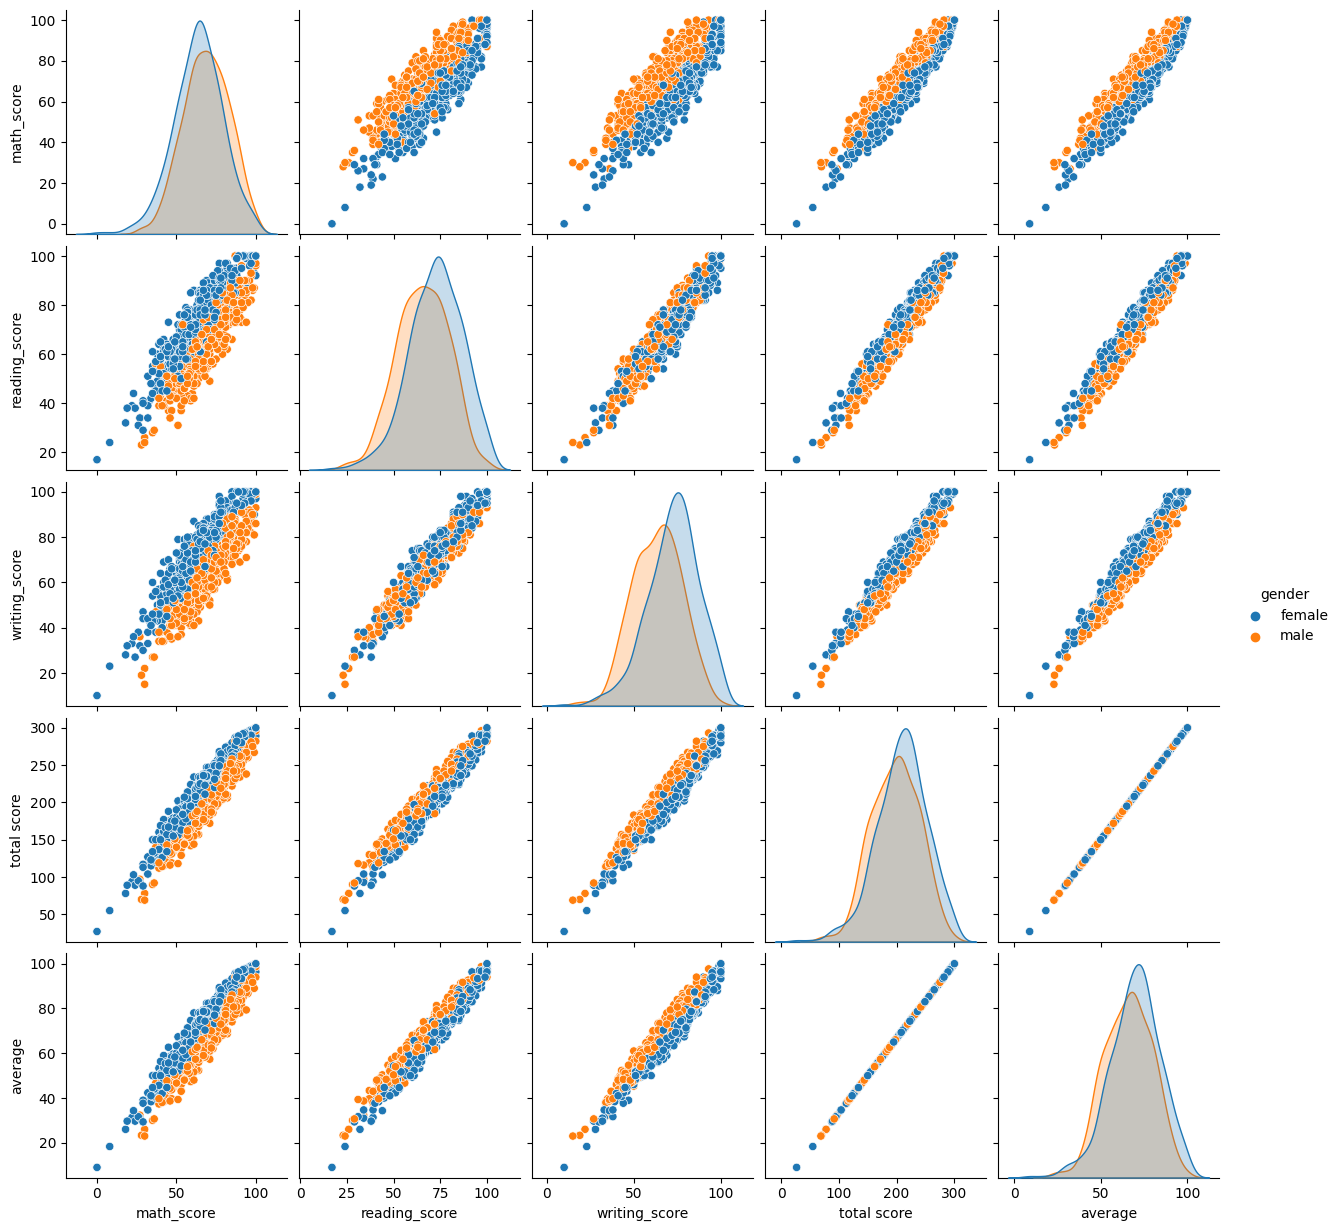

In [58]:
sns.pairplot(df,hue = 'gender')
plt.show()